# Experiment 2: Which alpha is better for Grokking?

## Imports

In [1]:
import json
import os

## File and JSON generation

In [1]:
job_folder = "../../results/experiment_2"

In [3]:
task_id = 0
repeats = 6  # Number of times to repeat each combination of alpha and grok

for alpha in [0.1, 1.0]:
    for grok in range(8):  # Iterate from 0 to 7 patterns
        for rep in range(repeats):  # Repeat each combination 6 times
            task_folder = os.path.join(job_folder, f"task_{task_id}")

            os.makedirs(task_folder, exist_ok=True)

            params = {
                'seed': task_id,
                'alpha': alpha,
                'grok': grok,
                'corrupt': 0,  # Keeping corrupt patterns at 0
            }

            json_path = os.path.join(task_folder, "params.json")

            with open(json_path, 'w') as f:
                json.dump(params, f)

            task_id += 1


In [4]:
task_id

96

## Which alpha is better for Grokking?

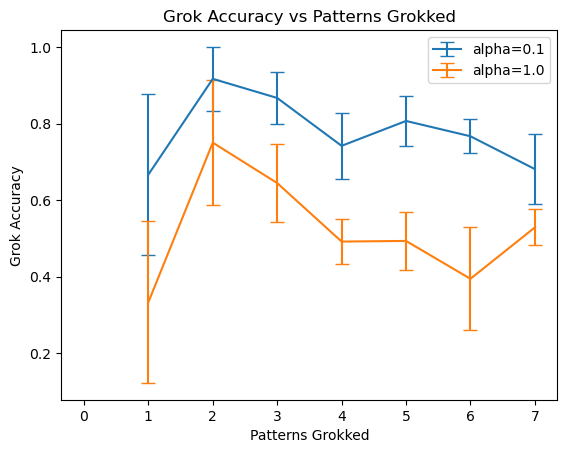

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

# Initialize lists to collect data
alpha_01_data = []
alpha_1_data = []


# Loop through task folders to collect last test_accuracy
for task_id in range(96):  # Assuming 96 tasks, as per your setup
    task_folder = os.path.join(job_folder, f"task_{task_id}")
    json_path = os.path.join(task_folder, "params.json")

    # Load parameters
    with open(json_path, 'r') as f:
        params = json.load(f)

    # Load metrics history
    metrics_csv_path = os.path.join(task_folder, "metrics_history.csv")
    df = pd.read_csv(metrics_csv_path)
    last_test_accuracy = df['grok_accuracy'].iloc[-1]

    # Store the last test accuracy with its corresponding alpha and grok
    if params['alpha'] == 0.1:
        alpha_01_data.append((params['grok'], last_test_accuracy))
    else:  # params['alpha'] == 1.0
        alpha_1_data.append((params['grok'], last_test_accuracy))

# Convert to DataFrames for easier manipulation
df_01 = pd.DataFrame(alpha_01_data, columns=['grok', 'accuracy'])
df_1 = pd.DataFrame(alpha_1_data, columns=['grok', 'accuracy'])

# Group by 'grok' and calculate mean and standard error
grouped_01 = df_01.groupby('grok')['accuracy'].agg(['mean', 'sem'])
grouped_1 = df_1.groupby('grok')['accuracy'].agg(['mean', 'sem'])

# Plotting
plt.errorbar(grouped_01.index, grouped_01['mean'], yerr=grouped_01['sem'], label='alpha=0.1', capsize=5)
plt.errorbar(grouped_1.index, grouped_1['mean'], yerr=grouped_1['sem'], label='alpha=1.0', capsize=5)

plt.xlabel('Patterns Grokked')
plt.ylabel('Grok Accuracy')
plt.title('Grok Accuracy vs Patterns Grokked')
plt.legend()

plt.show()